<a href="https://colab.research.google.com/github/karegapauline/Health-Environment-Data-Linking/blob/main/Articles_and_Papers_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction.**

Science communication plays an important role in translation of crucial scientific results to the public. It became popular in the 19th century when it became too specialized and required translation to be understood by the public who ranged from local shopkeepers, to enthusiasts who were experts in other subjects. Initially, this 'translation' or communication was done just within a specific network or group of enthusiasts. However, science communication now, you could say, has made possible interdisciplinary research by enhancing understanding between fields. It also made possible engagement with the public or those who the results impacted most, and other stakeholders who have significant impact on the lifecycle of the research.



**Literature Review.**

The media plays a central yet often underexamined role in the socio-technical landscape of health and environmental data, particularly in the communication of air pollution and its health effects. As a key actor situated between data producers (e.g., researchers, monitoring systems) and data consumers (e.g., the public, policymakers), the media serves not only to disseminate information but to shape its interpretation and prioritization.

Literature on environmental communication suggests that media narratives are instrumental in framing public understanding of complex, data-driven topics such as air quality, often translating highly technical spatial and temporal datasets into emotionally resonant or actionable stories (Boykoff, 2009; Schäfer & Schlichting, 2014). This framing significantly influences public perception, civic behavior, and political salience.

In both the Global North and South, the media contributes to the construction of what Hilgartner (2000) terms the “science-policy-public triangle,” whereby data is selectively communicated, recontextualized, and contested across stakeholder groups. In the UK, for instance, media coverage of Clean Air Zones (CAZ), smog alerts, and rising asthma hospitalizations has been linked to increased public discourse and local policy adjustments (Demski et al., 2020). In contrast, in countries like Kenya and South Africa, limited infrastructure for both environmental monitoring and science communication can hinder this loop, with media often acting as the only accessible source of environmental health information for the general population. However, reliance on local journalism in under-resourced settings can introduce both opportunities and limitations: while it offers cultural and linguistic resonance, it may lack the technical rigor needed to convey data complexity (Obonyo, 2021).
Moreover, the media not only communicates data but becomes a source of data itself. Sentiment analysis of news reports and social media discussions reveals public attitudes toward air pollution interventions, creating feedback loops that are increasingly used by researchers and policy analysts. In this way, the media participates in the generation of “narrative metadata,” an informal but socially powerful layer that influences how data is interpreted and used. This is particularly relevant in the context of policy advocacy and accountability, where headlines and viral posts often drive political attention more quickly than peer-reviewed evidence.

The differential roles and capacities of the media in the Global South versus the Global North underscore the need for comparative analysis. Understanding how media systems amplify or obscure air quality and health linkages can reveal critical points of failure or success in the broader data-to-policy pipeline. This study therefore aims to explore how media reporting—across three case countries: the UK, Kenya, and South Africa—has contributed to public knowledge, influenced policy responses, and shaped the perceived urgency of air pollution as a public health issue. In doing so, it positions the media as an active stakeholder in the environmental health data ecosystem, not merely as a passive transmitter of information but as a shaper of data culture and decision-making.



**Methodology Part 1.**

Article search to gauge how the media portrays air quality and health We use Feedparser v6.0.11 to scrape news feed data. Feedparser is used to download and parse feeds. We obtained news articles about air quality and health in Kenya, South Africa, and the United Kingdom. We targeted media houses that offered both digital and print articles. For Kenya, we used Nation Africa, Standard Media, and The Star. South Africa, Daily Maverick, timeslive, and news24. And for the UK, BBC, The Guardian, and Telegraph. We did not specify any timelines and gathered all articles. Our search terms were as follows: ”air pollution”, ”air quality”, "climate change", ”respiratory diseases”, and ”pollution policy”.



In [ ]:
pip install feedparser

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 2.2 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6046 sha256=2f0d5bfc8dcbbd251a3ade83050fb723224c4a8381620d91853852c00ab7ecac
  Stored in directory: /root/.cache/pip/wheels/3b/25/2a/105d6a15df6914f4d15047691c6c28f9052cc1173e40285d03
Successfully built sgmllib3k


In [ ]:
import feedparser
import pandas as pd
import time
from urllib.parse import quote_plus

# ------------------------
# CONFIGURATION
# ------------------------

SEARCH_TERMS = [
    "air pollution",
    "air quality",
    "respiratory illness",
    "respiratory disease",
    "air quality policy"
]

COUNTRY_SOURCES = {
    "Kenya": ["nation.africa", "standardmedia.co.ke", "the-star.co.ke"],
    "South Africa": ["dailymaverick.co.za", "timeslive.co.za", "news24.com"],
    "UK": ["bbc.co.uk", "theguardian.com", "telegraph.co.uk"]
}

# ------------------------
# FUNCTION TO PARSE GOOGLE RSS
# ------------------------

def fetch_articles(search_term, site):
    query = f'{search_term} site:{site}'
    encoded_query = quote_plus(query)
    url = f"https://news.google.com/rss/search?q={encoded_query}&hl=en-GB&gl=GB&ceid=GB:en"

    feed = feedparser.parse(url)
    articles = []

    for entry in feed.entries:
        articles.append({
            "search_term": search_term,
            "source_site": site,
            "title": entry.title,
            "link": entry.link,
            "published": entry.get("published", ""),
            "summary": entry.get("summary", "")
        })

    return articles

# ------------------------
# MAIN FUNCTION
# ------------------------

def scrape_google_news():
    for country, sources in COUNTRY_SOURCES.items():
        print(f"\n Scraping Google News for {country}...")
        all_records = []

        for site in sources:
            for term in SEARCH_TERMS:
                print(f"🔍 {term} @ {site}")
                articles = fetch_articles(term, site)
                all_records.extend(articles)
                time.sleep(1)  # be polite to Google servers

        # Save to CSV
        df = pd.DataFrame(all_records)
        filename = f"{country.lower().replace(' ', '_')}_gnews.csv"
        df.to_csv(filename, index=False)
        print(f"✅ Saved {len(df)} articles to {filename}")

if __name__ == "__main__":
    scrape_google_news()



 Scraping Google News for Kenya...
🔍 air pollution @ nation.africa
🔍 air quality @ nation.africa
🔍 respiratory illness @ nation.africa
🔍 respiratory disease @ nation.africa
🔍 air quality policy @ nation.africa
🔍 air pollution @ standardmedia.co.ke
🔍 air quality @ standardmedia.co.ke
🔍 respiratory illness @ standardmedia.co.ke
🔍 respiratory disease @ standardmedia.co.ke
🔍 air quality policy @ standardmedia.co.ke
🔍 air pollution @ the-star.co.ke
🔍 air quality @ the-star.co.ke
🔍 respiratory illness @ the-star.co.ke
🔍 respiratory disease @ the-star.co.ke
🔍 air quality policy @ the-star.co.ke
✅ Saved 1400 articles to kenya_gnews.csv

 Scraping Google News for South Africa...
🔍 air pollution @ dailymaverick.co.za
🔍 air quality @ dailymaverick.co.za
🔍 respiratory illness @ dailymaverick.co.za
🔍 respiratory disease @ dailymaverick.co.za
🔍 air quality policy @ dailymaverick.co.za
🔍 air pollution @ timeslive.co.za
🔍 air quality @ timeslive.co.za
🔍 respiratory illness @ timeslive.co.za
🔍 respira

In [ ]:
## FITERING OF RELEVANT ARTICLES
# REMOVE DUPLICATES first
import pandas as pd

# Load your file
df = pd.read_csv("kenya_gnews.csv")
df2 = pd.read_csv("uk_gnews.csv")
df3 = pd.read_csv("south_africa_gnews.csv")

# Normalize titles
df['clean_title'] = df['title'].str.lower().str.strip()
df2['clean_title'] = df2['title'].str.lower().str.strip()
df3['clean_title'] = df3['title'].str.lower().str.strip()

# Mark duplicates
df['duplicate'] = df.duplicated(subset='clean_title', keep='first')
df2['duplicate'] = df2.duplicated(subset='clean_title', keep='first')
df3['duplicate'] = df3.duplicated(subset='clean_title', keep='first')

# Save with duplicate flag
df.to_csv("kenya_gnews_deduped.csv", index=False)

df2.to_csv("uk_gnews_deduped.csv", index=False)

df3.to_csv("south_africa_gnews_deduped.csv", index=False)

# Save only unique articles
df[~df['duplicate']].to_csv("kenya_gnews_unique.csv", index=False)

df2[~df2['duplicate']].to_csv("uk_gnews_unique.csv", index=False)

df3[~df3['duplicate']].to_csv("south_africa_gnews_unique.csv", index=False)

print(f"✅ Found and removed {df['duplicate'].sum()} duplicates.")
print(f"✅ Found and removed {df2['duplicate'].sum()} duplicates.")
print(f"✅ Found and removed {df3['duplicate'].sum()} duplicates.")




✅ Found and removed 581 duplicates.
✅ Found and removed 523 duplicates.
✅ Found and removed 598 duplicates.


In [ ]:
## NOW REMOVE ALL HEADINGS THAT ARE NOT AIR QUALITY AND HEALTH RELATED
import pandas as pd

# Load your file
df = pd.read_csv("kenya_gnews_unique.csv")
df2 = pd.read_csv("uk_gnews_unique.csv")
df3 = pd.read_csv("south_africa_gnews_unique.csv")

# Filter titles that mention "air quality" or "health"
df_filtered = df[df['title'].str.contains(r'\b(air quality| pollution | cooking | electric | climate | diseases | breathing | cities | environmental |health)\b', case=False, na=False)]
df2_filtered = df2[df2['title'].str.contains(r'\b(air quality| pollution | cooking | electric | climate | diseases | breathing | cities | environmental |health)\b', case=False, na=False)]
df3_filtered = df3[df3['title'].str.contains(r'\b(air quality| pollution | cooking | electric | climate | diseases | breathing | cities | environmental |health)\b', case=False, na=False)]



# Normalize titles for deduplication
df_filtered['clean_title'] = df_filtered['title'].str.lower().str.strip()
df2_filtered['clean_title'] = df2_filtered['title'].str.lower().str.strip()
df3_filtered['clean_title'] = df3_filtered['title'].str.lower().str.strip()

# Mark exact duplicates
df_filtered['duplicate'] = df_filtered.duplicated(subset='clean_title', keep='first')
df2_filtered['duplicate'] = df2_filtered.duplicated(subset='clean_title', keep='first')
df3_filtered['duplicate'] = df3_filtered.duplicated(subset='clean_title', keep='first')

# Save filtered and deduplicated articles
df_filtered.to_csv("kenya_gnews_filtered_deduped.csv", index=False)
df2_filtered.to_csv("uk_gnews_filtered_deduped.csv", index=False)
df3_filtered.to_csv("south_africa_gnews_filtered_deduped.csv", index=False)

# Save only unique ones
df_filtered[~df_filtered['duplicate']].to_csv("kenya_gnews_filtered_unique.csv", index=False)
df2_filtered[~df2_filtered['duplicate']].to_csv("uk_gnews_filtered_unique.csv", index=False)
df3_filtered[~df3_filtered['duplicate']].to_csv("south_africa_gnews_filtered_unique.csv", index=False)

print(f"✅ Filtered to {len(df_filtered)} relevant articles, removed {df_filtered['duplicate'].sum()} duplicates.")
print(f"✅ Filtered to {len(df2_filtered)} relevant articles, removed {df2_filtered['duplicate'].sum()} duplicates.")
print(f"✅ Filtered to {len(df3_filtered)} relevant articles, removed {df3_filtered['duplicate'].sum()} duplicates.")




✅ Filtered to 110 relevant articles, removed 0 duplicates.
✅ Filtered to 200 relevant articles, removed 0 duplicates.
✅ Filtered to 140 relevant articles, removed 0 duplicates.


/tmp/ipython-input-2831715560.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_filtered = df[df['title'].str.contains(r'\b(air quality| pollution | cooking | electric | climate | diseases | breathing | cities | environmental |health)\b', case=False, na=False)]
/tmp/ipython-input-2831715560.py:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df2_filtered = df2[df2['title'].str.contains(r'\b(air quality| pollution | cooking | electric | climate | diseases | breathing | cities | environmental |health)\b', case=False, na=False)]
/tmp/ipython-input-2831715560.py:12: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df3_filtered = df3[df3['title'].str.contains(r'\b(air quality| pollution | cooking | electric | climate | disea

**Data mining results**

We got 1400 articles for Kenya, and 1500 for the UK and South Africa. This may be the limit of feed parser. We then removed duplicates and obtained 581, 523, and 598 articles for Kenya, UK, and SA respectively. These were further filtered to get articles that were based purely on air quality and health, finally getting to 110, 200, and 140 articles for Kenya, UK, and SA, respectively.


In [ ]:
##EXPLORE ARTICLES AND RESULLTS
filtered_ke =  pd.read_csv("kenya_gnews_filtered_unique.csv")
filtered_uk =  pd.read_csv("uk_gnews_filtered_unique.csv")
filtered_sa =  pd.read_csv("south_africa_gnews_filtered_unique.csv")

filtered_uk



,search_term,source_site,title,link,published,summary,clean_title,duplicate
0,air pollution,bbc.co.uk,High pollution warning issued for London by Ci...,https://news.google.com/rss/articles/CBMiXEFVX...,"Tue, 12 Aug 2025 05:23:40 GMT","<a href=""https://news.google.com/rss/articles/...",high pollution warning issued for london by ci...,False
1,air pollution,bbc.co.uk,Canadian wildfires prompt New York air quality...,https://news.google.com/rss/articles/CBMiXEFVX...,"Sat, 26 Jul 2025 07:00:00 GMT","<a href=""https://news.google.com/rss/articles/...",canadian wildfires prompt new york air quality...,False
2,air pollution,bbc.co.uk,How hot weather can make air pollution worse -...,https://news.google.com/rss/articles/CBMiWkFVX...,"Tue, 12 Aug 2025 15:10:54 GMT","<a href=""https://news.google.com/rss/articles/...",how hot weather can make air pollution worse -...,False
3,air pollution,bbc.co.uk,"Air pollution link to higher dementia risk, st...",https://news.google.com/rss/articles/CBMiXEFVX...,"Fri, 25 Jul 2025 07:00:00 GMT","<a href=""https://news.google.com/rss/articles/...","air pollution link to higher dementia risk, st...",False
4,air pollution,bbc.co.uk,"Air pollution levels falling in the UK, say sc...",https://news.google.com/rss/articles/CBMiY0FVX...,"Wed, 16 Jul 2025 07:00:00 GMT","<a href=""https://news.google.com/rss/articles/...","air pollution levels falling in the uk, say sc...",False
...,...,...,...,...,...,...,...,...
195,respiratory disease,telegraph.co.uk,What is your cough trying to tell you about yo...,https://news.google.com/rss/articles/CBMiekFVX...,"Mon, 19 Dec 2016 08:00:00 GMT","<a href=""https://news.google.com/rss/articles/...",what is your cough trying to tell you about yo...,False
196,air quality policy,telegraph.co.uk,Revealed: How Volkswagen-funded car diesel stu...,https://news.google.com/rss/articles/CBMiswFBV...,"Fri, 02 Feb 2018 08:00:00 GMT","<a href=""https://news.google.com/rss/articles/...",revealed: how volkswagen-funded car diesel stu...,False
197,air quality policy,telegraph.co.uk,XR billionaire funds Khan climate network - Th...,https://news.google.com/rss/articles/CBMiiwFBV...,"Sat, 11 Nov 2023 08:00:00 GMT","<a href=""https://news.google.com/rss/articles/...",xr billionaire funds khan climate network - th...,False
198,air quality policy,telegraph.co.uk,The British cities charging drivers clean air ...,https://news.google.com/rss/articles/CBMinAFBV...,"Fri, 08 Dec 2023 08:00:00 GMT","<a href=""https://news.google.com/rss/articles/...",the british cities charging drivers clean air ...,False


**Article Exploration results**

**The articles and the writing style differences**

Kenyan articles generally centered around clean cooking energy,

In [ ]:
pip install pandas scikit-learn nltk

In [ ]:
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# -------------------------------
# STEP 0: Prepare stopwords
# -------------------------------
stop_words = set(stopwords.words("english"))

# -------------------------------
# STEP 1: Function to load & tag
# -------------------------------
def load_and_tag(filepath, country):
    df = pd.read_csv(filepath)
    df['country'] = country
    return df

# -------------------------------
# STEP 2: Concatenate articles
# -------------------------------
df_kenya = load_and_tag("kenya_gnews.csv", "Kenya")
df_sa = load_and_tag("south_africa_gnews.csv", "South Africa")
df_uk = load_and_tag("uk_gnews.csv", "UK")

df_all = pd.concat([df_kenya, df_sa, df_uk], ignore_index=True)
df_all = df_all[df_all['title'].notna()].copy()

# -------------------------------
# STEP 3: Preprocess Titles
# -------------------------------
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', str(text))  # remove non-letters
    text = text.lower()  # lowercase
    tokens = text.split()
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]  # remove stopwords & short words
    return " ".join(tokens)

df_all['clean_title'] = df_all['title'].apply(clean_text)

# -------------------------------
# STEP 4: Save Output
# -------------------------------
df_all.to_csv("all_countries_grouped_articles.csv", index=False)
print("\n✅ Saved grouped articles to 'all_countries_grouped_articles.csv'")

# -------------------------------
# STEP 5: Preview
# -------------------------------
print(df_all.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



✅ Saved grouped articles to 'all_countries_grouped_articles.csv'
     search_term    source_site  \
0  air pollution  nation.africa   
1  air pollution  nation.africa   
2  air pollution  nation.africa   
3  air pollution  nation.africa   
4  air pollution  nation.africa   

                                               title  \
0  Breathing air of death: Coal dust pollution pl...   
1  Environmentalists raise concern as air polluti...   
2  Pollution: What will the world be like for fut...   
3  Here comes Kenya's first locally assembled ele...   
4  Africa and Asia worst hit by air pollution, WH...   

                                                link  \
0  https://news.google.com/rss/articles/CBMisAFBV...   
1  https://news.google.com/rss/articles/CBMixgFBV...   
2  https://news.google.com/rss/articles/CBMimAFBV...   
3  https://news.google.com/rss/articles/CBMinwFBV...   
4  https://news.google.com/rss/articles/CBMipgFBV...   

                       published  \
0  Sun, 07 Ja

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✅ Saved categorized data to 'all_countries_grouped_articles_categorized.csv'


<Figure size 1200x700 with 0 Axes>

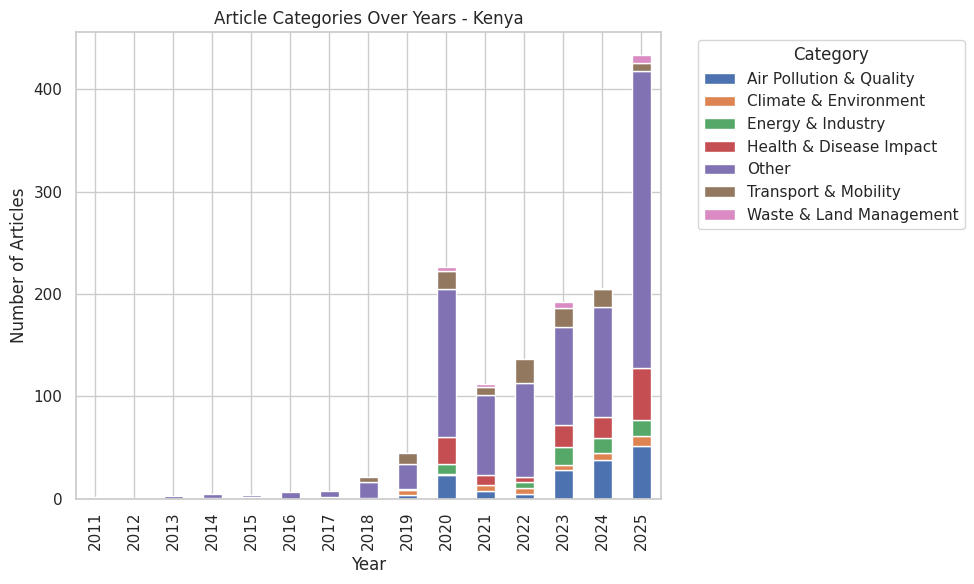

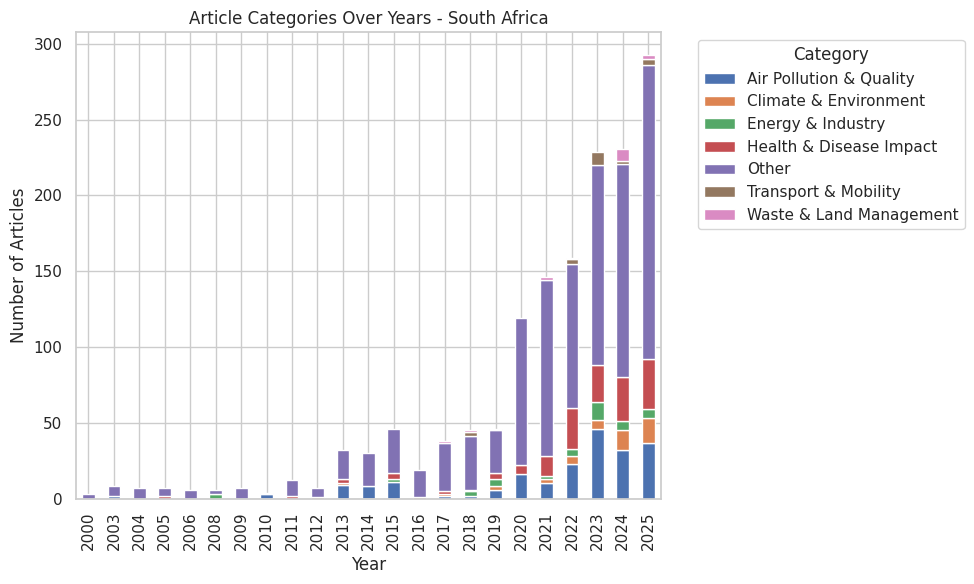

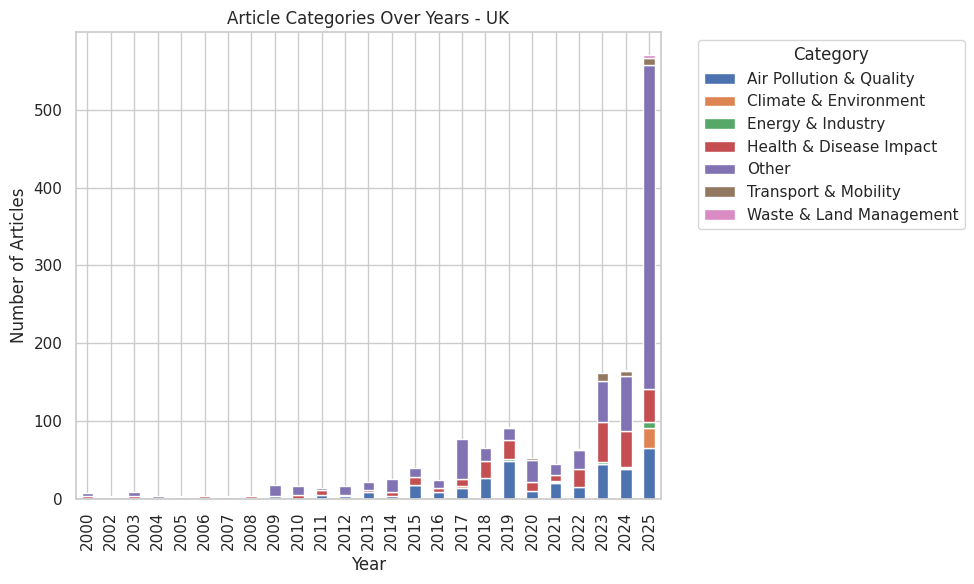

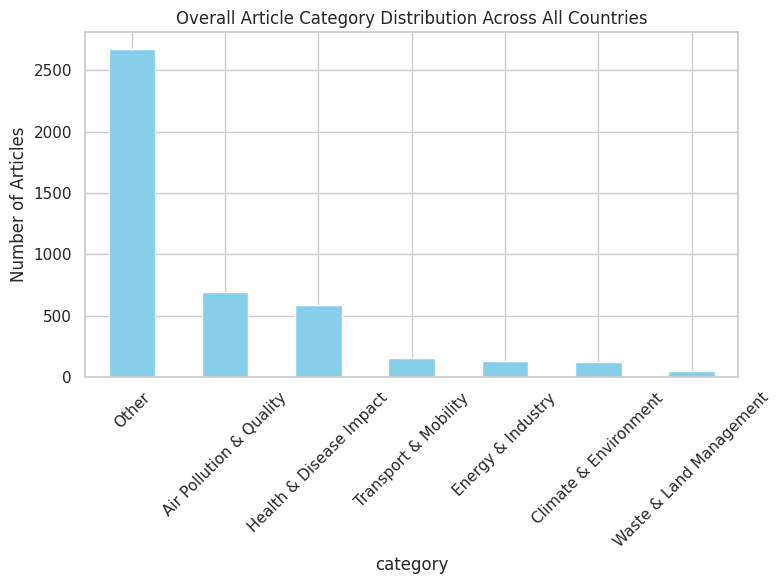

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# -------------------------------
# STEP 0: Prepare stopwords
# -------------------------------
import nltk
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# -------------------------------
# STEP 1: Function to load & tag
# -------------------------------
def load_and_tag(filepath, country):
    df = pd.read_csv(filepath)
    df['country'] = country
    return df

# -------------------------------
# STEP 2: Concatenate articles
# -------------------------------
df_kenya = load_and_tag("kenya_gnews.csv", "Kenya")
df_sa = load_and_tag("south_africa_gnews.csv", "South Africa")
df_uk = load_and_tag("uk_gnews.csv", "UK")

df_all = pd.concat([df_kenya, df_sa, df_uk], ignore_index=True)
df_all = df_all[df_all['title'].notna()].copy()

# -------------------------------
# STEP 3: Clean titles
# -------------------------------
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', str(text))
    text = text.lower()
    tokens = text.split()
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]
    return " ".join(tokens)

df_all['clean_title'] = df_all['title'].apply(clean_text)

# -------------------------------
# STEP 4: Extract Year
# -------------------------------
df_all['published'] = pd.to_datetime(df_all['published'], errors='coerce')
df_all['year'] = df_all['published'].dt.year

# -------------------------------
# STEP 5: Categorize articles
# -------------------------------
def classify_article(title):
    title = title.lower()
    if any(k in title for k in ['pollution', 'air quality', 'smog', 'pm2.5', 'pm10', 'dirty air']):
       return 'Air Pollution & Quality'
    elif any(k in title for k in ['health', 'disease', 'illness', 'mortality', 'asthma', 'dementia', 'respiratory']):
        return 'Health & Disease Impact'
    elif any(k in title for k in ['climate change', 'global warming', 'emissions', 'weather', 'heatwave']):
        return 'Climate & Environment'
    elif any(k in title for k in ['vehicle', 'transport', 'bus', 'boda', 'ulez', 'clean air zone']):
        return 'Transport & Mobility'
    elif any(k in title for k in ['fuel', 'stove', 'cooking', 'industry', 'factory', 'factories', 'mining', 'energy']):
        return 'Energy & Industry'
    elif any(k in title for k in ['waste', 'burning', 'landfill', 'recycling', 'deforestation', 'land use']):
        return 'Waste & Land Management'
    else:
        return 'Other'

df_all['category'] = df_all['title'].apply(classify_article)

# -------------------------------
# STEP 6: Save cleaned + categorized data
# -------------------------------
df_all.to_csv("all_countries_grouped_articles_categorized.csv", index=False)
print("✅ Saved categorized data to 'all_countries_grouped_articles_categorized.csv'")

# -------------------------------
# STEP 7: Plot Stacked Bar Charts
# -------------------------------
plt.figure(figsize=(12, 7))
grouped = df_all.groupby(['country', 'year', 'category']).size().unstack(fill_value=0)

# Plot per country
for country in df_all['country'].unique():
    country_data = df_all[df_all['country'] == country]
    yearly_counts = country_data.groupby(['year', 'category']).size().unstack(fill_value=0)
    yearly_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f"Article Categories Over Years - {country}")
    plt.xlabel("Year")
    plt.ylabel("Number of Articles")
    plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig(f"{country.lower().replace(' ', '_')}_stacked_bar.png")
    plt.show()

# -------------------------------
# STEP 8: Overall distribution
# -------------------------------
overall_counts = df_all['category'].value_counts()
plt.figure(figsize=(8, 6))
overall_counts.plot(kind='bar', color='skyblue')
plt.title("Overall Article Category Distribution Across All Countries")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("overall_category_distribution.png")
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load the uploaded dataset
file_path = 'all_countries_grouped_articles.csv'
df = pd.read_csv(file_path)

# Ensure published is datetime
df['published'] = pd.to_datetime(df['published'], errors='coerce')
df['year'] = df['published'].dt.year

# Classification function with fewer, stronger categories
def classify_article(title):
    title = str(title).lower()

    # Air Pollution & Quality
    if any(kw in title for kw in ['pollution', 'air quality', 'smog', 'pm2.5', 'pm10', 'dirty air']):
        return 'Air Pollution & Quality'

    # Health & Disease Impact
    elif any(kw in title for kw in ['health', 'disease', 'illness', 'mortality', 'asthma', 'dementia', 'respiratory']):
        return 'Health & Disease Impact'

    # Climate & Environment
    elif any(kw in title for kw in ['climate change', 'global warming', 'emissions', 'weather', 'heatwave']):
        return 'Climate & Environment'

    # Transport & Mobility
    elif any(kw in title for kw in ['vehicle', 'transport', 'bus', 'boda', 'ulez', 'clean air zone']):
        return 'Transport & Mobility'

    # Energy & Industry
    elif any(kw in title for kw in ['fuel', 'stove', 'cooking', 'industry', 'factory', 'factories', 'mining', 'energy']):
        return 'Energy & Industry'

    # Waste & Land Management
    elif any(kw in title for kw in ['waste', 'burning', 'landfill', 'recycling', 'deforestation', 'land use']):
        return 'Waste & Land Management'

    else:
        return 'Other'

# Apply classification
df['category'] = df['clean_title'].apply(classify_article)

# Category counts per country
category_counts_country = df.groupby(['country', 'category']).size().unstack(fill_value=0)

# Overall category distribution
overall_counts = df['category'].value_counts()

# --- Visualization ---
plt.figure(figsize=(14, 10))

# 1. Stacked bar plot per country
category_counts_country.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Article Categories by Country')
plt.xlabel('Country')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('category_by_country.png', dpi=300)
plt.close()

# 2. Overall category distribution bar plot
overall_counts.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title('Overall Article Category Distribution')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('overall_category_distribution.png', dpi=300)
plt.close()

# Save cleaned dataset
output_path = 'articles_with_categories.csv'
df.to_csv(output_path, index=False)

category_counts_country, overall_counts, output_path, 'category_by_country.png', 'overall_category_distribution.png'


(category      Air Pollution & Quality  Climate & Environment  \
 country                                                        
 Kenya                             158                     38   
 South Africa                      207                     47   
 UK                                328                     34   
 
 category      Energy & Industry  Health & Disease Impact  Other  \
 country                                                           
 Kenya                        65                      139    870   
 South Africa                 44                      152   1012   
 UK                           18                      293    793   
 
 category      Transport & Mobility  Waste & Land Management  
 country                                                      
 Kenya                          108                       22  
 South Africa                    22                       16  
 UK                              27                        7  ,
 category
 Othe

**RESULTS**

There is an overall surge in articles about air quality and health from 2020 in Kenya.  

In [ ]:
import pandas as pd
import re

# Load CSV
file_path = 'all_countries_grouped_articles.csv'
df = pd.read_csv(file_path)

# Define broad categories and associated keywords
categories = {
    "Health impact focus": [
        "death", "disease", "hospital", "illness", "asthma",
        "mortality", "die", "health"
    ],
    "Policy and governance": [
        "policy", "law", "ban", "regulation", "government",
        "minister", "parliament"
    ],
    "Pollution source identification": [
        "vehicle", "car", "factory", "industry", "smoke",
        "fire", "burn", "diesel"
    ],
    "Climate/environment link": [
        "climate", "global warming", "carbon", "emissions",
        "environment", "greenhouse"
    ],
}

# Classification function
def classify_article(title, country):
    title_lower = title.lower()
    for category, keywords in categories.items():
        if any(re.search(rf"\b{kw}\b", title_lower) for kw in keywords):
            return category
    return "Other/General news"

# Apply classification
df['simple_category'] = df.apply(
    lambda x: classify_article(x['clean_title'], x['country']), axis=1
)

# Group and count
country_category_counts = (
    df.groupby(['country', 'simple_category'])
    .size()
    .unstack(fill_value=0)
)

# Save classification results
df.to_csv("classified_articles.csv", index=False)
country_category_counts.to_csv("country_category_summary.csv")

print("Classification complete. Results saved as 'classified_articles.csv' and 'country_category_summary.csv'.")


Classification complete. Results saved as 'classified_articles.csv' and 'country_category_summary.csv'.


Unique countries in dataset: ['Kenya' 'South Africa' 'UK']


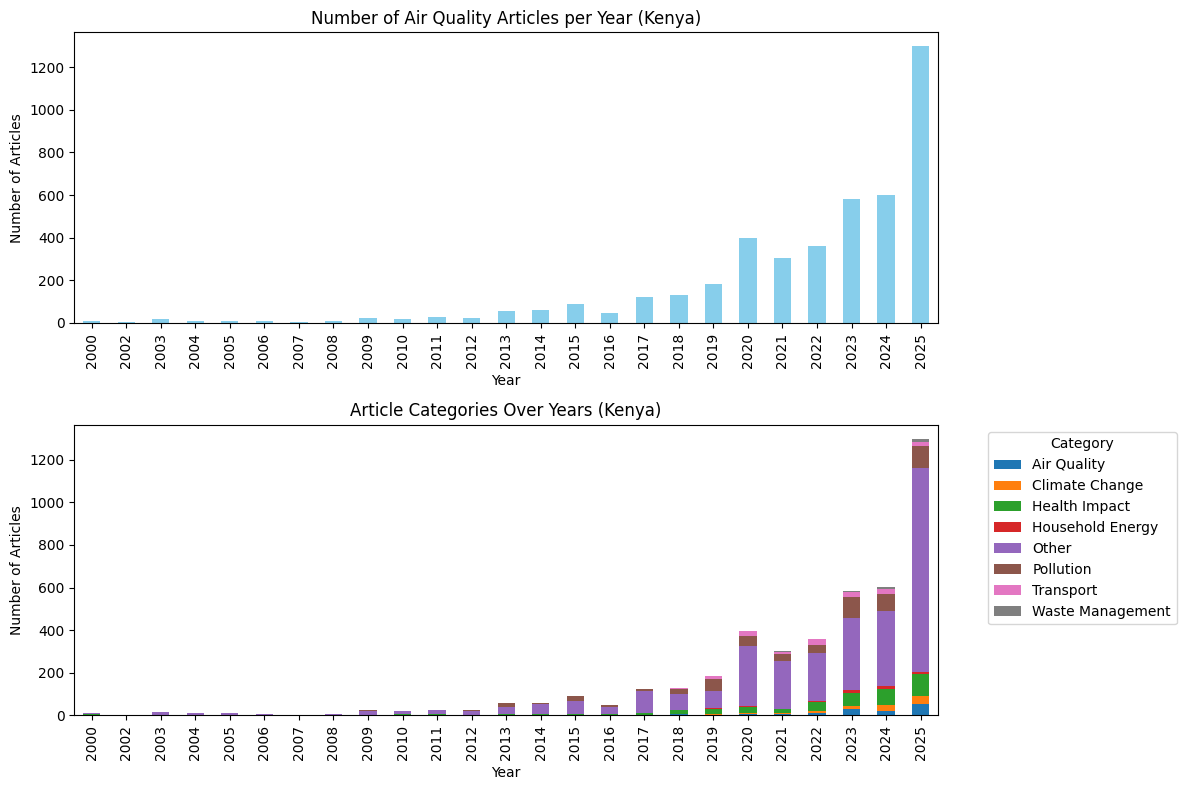


Category Distribution:
category
Other               2939
Pollution            539
Health Impact        425
Air Quality          155
Transport            146
Climate Change        98
Household Energy      58
Waste Management      40
Name: count, dtype: int64

Sample Articles from Each Category:

Pollution:
                                                                            clean_title  year
         breathing air death coal dust pollution plagues mombasa residents daily nation  2024
environmentalists raise concern air pollution chokes cities towns protests daily nation  2024
                                   pollution world like future generations daily nation  2021

Transport:
                                                        clean_title  year
     comes kenyas first locally assembled electric bus daily nation  2023
nairobis quiet revolution transition electric vehicles daily nation  2023
                                  vehicles pollute air daily nation  2024

Househo

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load the data
df = pd.read_csv('all_countries_grouped_articles.csv')

# Check unique countries (though we already know they're all Kenya)
print("Unique countries in dataset:", df['country'].unique())

# Extract year from published date
df['published'] = pd.to_datetime(df['published'])
df['year'] = df['published'].dt.year

# Simple classification based on title keywords
def classify_article(title):
    title = title.lower()
    if 'pollution' in title:
        return 'Pollution'
    elif 'air quality' in title or 'dust' in title:
        return 'Air Quality'
    elif 'health' in title or 'disease' in title or 'mortality' in title:
        return 'Health Impact'
    elif 'climate' in title:
        return 'Climate Change'
    elif 'vehicle' in title or 'transport' in title or 'bus' in title:
        return 'Transport'
    elif 'cooking' in title or 'fuel' in title or 'stove' in title:
        return 'Household Energy'
    elif 'waste' in title or 'burning' in title:
        return 'Waste Management'
    else:
        return 'Other'

df['category'] = df['clean_title'].apply(classify_article)

# Analyze yearly trends
yearly_trends = df.groupby(['year', 'category']).size().unstack().fillna(0)

# Plotting
plt.figure(figsize=(12, 8))

# Plot 1: Articles per year
plt.subplot(2, 1, 1)
df['year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Air Quality Articles per Year (Kenya)')
plt.xlabel('Year')
plt.ylabel('Number of Articles')

# Plot 2: Categories over years
plt.subplot(2, 1, 2)
yearly_trends.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Article Categories Over Years (Kenya)')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Show category distribution
print("\nCategory Distribution:")
print(df['category'].value_counts())

# Show sample articles from each category
print("\nSample Articles from Each Category:")
for category in df['category'].unique():
    print(f"\n{category}:")
    print(df[df['category'] == category][['clean_title', 'year']].head(3).to_string(index=False))

In [ ]:
classified_articles = pd.read_csv("classified_articles.csv")
country_category_summary = pd.read_csv("country_category_summary.csv")
country_category_summary

In [ ]:
pip install pandas scikit-learn nltk

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk
import re
from nltk.corpus import stopwords

# Download stopwords if needed
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# -------------------------------
# STEP 1: Load all CSVs
# -------------------------------
def load_and_tag(filename, country_name):
    df = pd.read_csv(filename)
    df['country'] = country_name
    return df

df_kenya = load_and_tag("kenya_gnews.csv", "Kenya")
df_sa = load_and_tag("south_africa_gnews.csv", "South Africa")
df_uk = load_and_tag("uk_gnews.csv", "UK")

df_all = pd.concat([df_kenya, df_sa, df_uk], ignore_index=True)
df_all = df_all[df_all['title'].notna()].copy()

# -------------------------------
# STEP 2: Preprocess Titles
# -------------------------------
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', str(text))
    text = text.lower()
    tokens = text.split()
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]
    return " ".join(tokens)

df_all['clean_title'] = df_all['title'].apply(clean_text)

# -------------------------------
# STEP 3: Vectorize & Cluster
# -------------------------------
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_all['clean_title'])

k = 6  # Number of clusters (you can tweak this)
model = KMeans(n_clusters=k, random_state=42)
df_all['topic_cluster'] = model.fit_predict(X)

# -------------------------------
# STEP 4: Display Top Terms per Cluster
# -------------------------------
print("\n🧠 Top keywords per topic:")
terms = vectorizer.get_feature_names_out()
order_centroids = model.cluster_centers_.argsort()[:, ::-1]

for i in range(k):
    top_words = [terms[ind] for ind in order_centroids[i, :10]]
    print(f"\n🗂️ Cluster {i + 1}: {', '.join(top_words)}")

# -------------------------------
# STEP 5: Save Output
# -------------------------------
df_all.to_csv("all_countries_grouped_articles.csv", index=False)
print("\n✅ Saved grouped articles to 'all_countries_grouped_articles.csv'")


In [ ]:
##Fix clusters that are listed here. They are not informative in any way at all
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure seaborn looks nice
sns.set(style="whitegrid")

# Count articles per cluster
cluster_counts = df_all['topic_cluster'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")

plt.title("🧠 Distribution of News Articles by Topic Cluster", fontsize=14)
plt.xlabel("Topic Cluster ID", fontsize=12)
plt.ylabel("Number of Articles", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

# Save chart
plt.savefig("cluster_distribution_chart.png")
plt.show()


KeyError: 'topic_cluster'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

# Load data
df = pd.read_csv("all_countries_grouped_articles.csv")
df['published'] = pd.to_datetime(df['published'], errors='coerce')
df['year'] = df['published'].dt.year

# Classification function (tweaked for your 3 countries)
def classify_article(title):
    t = title.lower()
    if 'pollution' in t:
        return 'Pollution'
    elif 'air quality' in t:
        return 'Air Quality'
    elif 'health' in t or 'disease' in t or 'mortality' in t:
        return 'Health Impact'
    elif 'climate' in t:
        return 'Climate Change'
    elif 'vehicle' in t or 'transport' in t or 'bus' in t or 'ulez' in t:
        return 'Transport'
    elif 'cooking' in t or 'fuel' in t or 'stove' in t:
        return 'Household Energy'
    elif 'waste' in t or 'burning' in t:
        return 'Waste Management'
    else:
        return 'Other'

df['category'] = df['clean_title'].apply(classify_article)

# Calculate overall category order
overall_category_counts = df['category'].value_counts()
category_order = overall_category_counts.index.tolist()

# ====== EXPORT STEP ======
# Save sorted overall counts
overall_category_counts.to_csv("overall_category_counts.csv")

# Save per-country counts sorted by category order
country_category_counts = (
    df.groupby(['country', 'category'])
    .size()
    .unstack(fill_value=0)
    .reindex(columns=category_order)
)
country_category_counts.to_csv("category_counts_per_country.csv")

# Save per-country percentages
category_percentages_per_country = (
    country_category_counts.div(country_category_counts.sum(axis=1), axis=0) * 100
)
category_percentages_per_country.to_csv("category_percentages_per_country.csv")

# ====== VISUALIZATION SETTINGS ======
sns.set_theme(style="whitegrid")
country_palette = {
    "Kenya": "#1b9e77",
    "South Africa": "#d95f02",
    "UK": "#7570b3"
}

# 1️⃣ Stacked bar plots per country over years
for country in df['country'].unique():
    country_data = df[df['country'] == country]
    yearly_trends = (
        country_data.groupby(['year', 'category'])
        .size()
        .unstack(fill_value=0)
        .reindex(columns=category_order)
    )

    ax = yearly_trends.plot(
        kind='bar',
        stacked=True,
        figsize=(10, 6),
        colormap='tab20'
    )
    plt.title(f"Article Categories Over Years ({country})", fontsize=14, weight='bold')
    plt.ylabel("Number of Articles")
    plt.xlabel("Year")
    plt.tight_layout()
    plt.savefig(f"{country.lower().replace(' ', '_')}_stacked_trends.png", dpi=300)
    plt.close()

# 2️⃣ Overall category distribution
plt.figure(figsize=(8, 6))
overall_category_counts.loc[category_order].plot(kind='bar', color='skyblue')
plt.title("Overall Category Distribution Across All Countries", fontsize=14, weight='bold')
plt.ylabel("Number of Articles")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("overall_category_distribution.png", dpi=300)
plt.close()

# 3️⃣ Grouped bar chart for percentage comparison
ax = category_percentages_per_country.T.plot(
    kind='bar',
    figsize=(12, 6),
    color=[country_palette[c] for c in category_percentages_per_country.index]
)

plt.title("Category Percentage Comparison by Country", fontsize=14, weight='bold')
plt.ylabel("Percentage of Articles (%)")
plt.xticks(rotation=45, ha='right')

# Add percentage labels
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f"{height:.1f}%",
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=8, rotation=0)

plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("category_percentage_comparison.png", dpi=300)
plt.close()


**RESULTS**



We selected media houses that had both print and digital media.
For Kenya's daily nation, some articles required subscription to access or read. Many of these smaller articles, which is where air pollution and health articles fall, do not make it to print media nor are they translated. Therefore, visibility is limited to those who have internet and can afford the daily or yearly subscriptions.

**Comparison of the three countries. **
There are clear patterns in the titles and areas of focus when it comes to air quality and health.
**Kenya**
The articles focus on


** Discussion. **
Whoever communication is being left to greatly impacts the view of the public about issues. Climate change has been a controversial topic of communication since it came up, with a good divide between people who believe it and those who do not. Prominent leaders like the US president shutting down places like NOAAA, and department of environment, such big moves have definitely had an impact on people's views on the importance of the issue.

The media plays a crucial role in shaping peoples views and beliefs. The style of writing and communication, the extent of details and more, all shape information made available and what people believe and know. the UK add links to quoted research, allowing people to further read about the research and get more information. Kenya's news rely more on paraphrased research without links to articles or other resources.

There's the issue of watered

In [ ]:
all_articles = pd.read_csv("all_countries_grouped_articles.csv")
all_articles